<a href="https://colab.research.google.com/github/atik-bd/MSc-BA/blob/main/ML_Household_Income_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

##Data Reading

In [ ]:
# Mounting the packages into Colab
from pandas import read_csv, DataFrame, get_dummies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from  plotly import figure_factory

In [ ]:
# Mounting the dataset into Colab
data1=read_csv("/content/Regression Dataset for Household Income Analysis.csv")

In [ ]:
# Checking the first ten rows of the dataset
data1.head(10)

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
5,25,High School,Others,1,Rural,6,Single,Part-time,1,Rent,Townhouse,Female,Car,73406
6,38,Master's,Technology,3,Rural,20,Married,Full-time,4,Rent,Single-family home,Male,Public transit,3584362
7,56,Master's,Education,1,Suburban,34,Married,Part-time,7,Own,Townhouse,Female,Public transit,70066
8,36,Master's,Finance,4,Suburban,45,Married,Full-time,2,Own,Apartment,Female,Public transit,69636
9,40,Bachelor's,Education,4,Urban,21,Married,Full-time,6,Own,Apartment,Female,Biking,5188124


In [ ]:
# Checking the numbers of rows and columns (features) in the dataset
data1.shape

(10000, 14)

In [ ]:
# Checking the basic statistics for the dataset
data1.describe()

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,44.021700,2.527000,24.858800,3.989600,8.168382e+05
std,15.203998,1.713991,14.652622,2.010496,1.821089e+06
min,18.000000,0.000000,0.000000,1.000000,3.104400e+04
25%,31.000000,1.000000,12.000000,2.000000,6.844600e+04
50%,44.000000,3.000000,25.000000,4.000000,7.294300e+04
75%,57.000000,4.000000,37.000000,6.000000,3.506675e+05
max,70.000000,5.000000,50.000000,7.000000,9.992571e+06


In [ ]:
# Checking the dataset for number of features and data types
data1.info() #Found no mssing data in any features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

## Data Encoding

In [ ]:
# Checking features with object data type
print("Education_Level:", data1['Education_Level'].unique())
print("Occupation:", data1['Occupation'].unique())
print("Location:", data1['Location'].unique())
print("Marital_Status:", data1['Marital_Status'].unique())
print("Employment_Status:", data1['Employment_Status'].unique())
print("Homeownership_Status:", data1['Homeownership_Status'].unique())
print("Type_of_Housing:", data1['Type_of_Housing'].unique())
print("Primary_Mode_of_Transportation:", data1['Primary_Mode_of_Transportation'].unique())
print("Gender:", data1['Gender'].unique())

Education_Level: ["Master's" 'High School' "Bachelor's" 'Doctorate']
Occupation: ['Technology' 'Finance' 'Others' 'Education' 'Healthcare']
Location: ['Urban' 'Rural' 'Suburban']
Marital_Status: ['Married' 'Single' 'Divorced']
Employment_Status: ['Full-time' 'Self-employed' 'Part-time']
Homeownership_Status: ['Own' 'Rent']
Type_of_Housing: ['Apartment' 'Single-family home' 'Townhouse']
Primary_Mode_of_Transportation: ['Public transit' 'Biking' 'Car' 'Walking']
Gender: ['Male' 'Female']


In [ ]:
# Binary Encoding_ converting categorical features into numerical binary values
data1['Homeownership_Status']=data1['Homeownership_Status'].map({"Own":1,"Rent":0})
data1['Gender']=data1['Gender'].map({"Female":1,"Male":0})

In [ ]:
# Label encoding for ordinal categorical variables
data1['Education_Level']=data1['Education_Level'].map({'Doctorate':3,"Master's":2,"Bachelor's":1,'High School':0})
data1['Location']=data1['Location'].map({"Urban":2,'Suburban':1,"Rural":0})

In [ ]:
# One-Hot Encoding_ converts categorical features into multiple binary columns, drop first column to reduce feature
data1=get_dummies(data1,['Occupation','Marital_Status','Employment_Status','Type_of_Housing','Primary_Mode_of_Transportation'],dtype=int,drop_first=True)

In [ ]:
# checking the modified data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Age                                            10000 non-null  int64
 1   Education_Level                                10000 non-null  int64
 2   Number_of_Dependents                           10000 non-null  int64
 3   Location                                       10000 non-null  int64
 4   Work_Experience                                10000 non-null  int64
 5   Household_Size                                 10000 non-null  int64
 6   Homeownership_Status                           10000 non-null  int64
 7   Gender                                         10000 non-null  int64
 8   Income                                         10000 non-null  int64
 9   Occupation_Finance                             10000 non-null  int64
 10 

In [ ]:
#Heatmap
correlation=data1.corr()
f=figure_factory.create_annotated_heatmap(correlation.values,list(correlation.columns),list(correlation.columns),correlation.round(2).values,showscale=True)
f.show()

**As there are no features that are highly correlated with others, we are not dropping any features using this heatmap observation**

##Data Scaling

In [ ]:
# Dividing dataset into label and feature sets
X = data1.drop(['Income'], axis = 1) # Features
Y = data1['Income'] # Labels
print(X.shape)
print(Y.shape)

(10000, 21)
(10000,)


In [ ]:
# data Scaling
x_scaled = StandardScaler().fit_transform(X)
x_scaled_n= DataFrame(x_scaled,columns=X.columns) #adding column names in dataframe

##Feature Reduction using P values

In [ ]:
import statsmodels.api as sm
p_model=sm.add_constant(x_scaled_n)
p_model2=sm.OLS(Y,p_model).fit()
print(p_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     5.717
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.00e-16
Time:                        14:45:03   Log-Likelihood:            -1.5828e+05
No. Observations:               10000   AIC:                         3.166e+05
Df Residuals:                    9978   BIC:                         3.168e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [ ]:
print("Best fit R-squared:", p_model2.rsquared)
print("Best fit Adjusted R-squared:", p_model2.rsquared_adj)

Best fit R-squared: 0.011889027799449448
Best fit Adjusted R-squared: 0.00980941961983317


**The linear model explains only 1.2% of the variance in Income. So, the relationship could be nonlinear or the predictors could just be weak.**

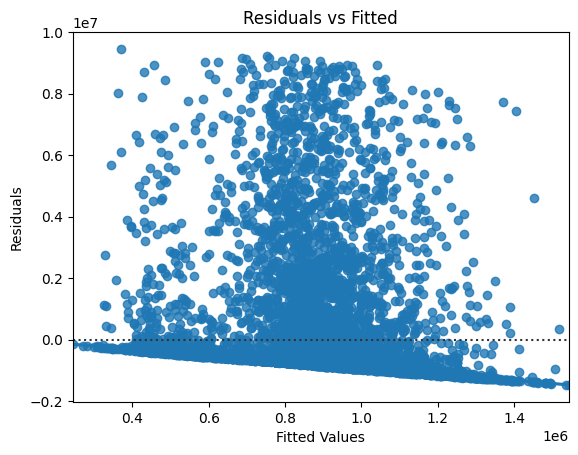

In [ ]:
import statsmodels.stats.diagnostic as smd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import plot_ccpr_grid
sns.residplot(x=p_model2.fittedvalues, y=p_model2.resid, lowess=True)
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [ ]:
p_values= p_model2.pvalues
significant_features=p_values[p_values<=0.05]
print(significant_features)

const                                 0.000000e+00
Education_Level                       1.290769e-02
Location                              2.991154e-08
Work_Experience                       8.136469e-03
Homeownership_Status                  3.711510e-10
Occupation_Finance                    1.289802e-03
Occupation_Healthcare                 2.479451e-02
Employment_Status_Part-time           2.185803e-03
Type_of_Housing_Single-family home    3.776621e-02
Type_of_Housing_Townhouse             1.243928e-02
dtype: float64


In [ ]:
x_adjusted = p_model[significant_features.index]
x_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   const                               10000 non-null  float64
 1   Education_Level                     10000 non-null  float64
 2   Location                            10000 non-null  float64
 3   Work_Experience                     10000 non-null  float64
 4   Homeownership_Status                10000 non-null  float64
 5   Occupation_Finance                  10000 non-null  float64
 6   Occupation_Healthcare               10000 non-null  float64
 7   Employment_Status_Part-time         10000 non-null  float64
 8   Type_of_Housing_Single-family home  10000 non-null  float64
 9   Type_of_Housing_Townhouse           10000 non-null  float64
dtypes: float64(10)
memory usage: 781.4 KB


# Linear Regression (LR)

In [ ]:
# Linear Regression (LR)
LinearRegression1 = linear_model.SGDRegressor(random_state = 1, penalty = None) # building
Hparameter1 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000]}
grid_search1 = GridSearchCV(estimator=LinearRegression1, param_grid=Hparameter1, scoring='r2', cv=5)
grid_search1.fit(x_adjusted,Y)

best_parameters = grid_search1.best_params_
print("Best parameters: ", best_parameters)
best_result_LR = grid_search1.best_score_
print("Best result: ", best_result_LR)
best_model_LR = grid_search1.best_estimator_
print("Intercept β0: ", best_model_LR.intercept_)
print(DataFrame(zip(x_adjusted.columns, best_model_LR.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

Best parameters:  {'eta0': 0.001, 'max_iter': 10000}
Best result:  0.008097903098723557
Intercept β0:  [408206.13322903]
                             Features   Coefficients
0                               const  408206.133229
7         Employment_Status_Part-time   60371.583460
6               Occupation_Healthcare  -30903.215905
8  Type_of_Housing_Single-family home  -38938.129261
3                     Work_Experience  -45437.286479
1                     Education_Level  -45567.115717
9           Type_of_Housing_Townhouse  -51712.675082
5                  Occupation_Finance  -56413.477160
2                            Location -100830.495072
4                Homeownership_Status -112541.899610


In [ ]:
# #  Regularization
LinearRegression2 = linear_model.SGDRegressor(random_state = 1, penalty = 'elasticnet') # model building
Hparameter2 = {'eta0': [.0001, .001, .01, .1, 1], 'max_iter':[10000, 20000, 30000, 40000],'alpha': [.001, .01, .1, 1,10, 100], 'l1_ratio': [0,0.25,0.5,0.75,1]}

grid_search2 = GridSearchCV(estimator=LinearRegression2, param_grid=Hparameter2, scoring='r2', cv=5)
grid_search2.fit(x_adjusted, Y)

best_parameters_LR2 = grid_search2.best_params_
print("Best parameters: ", best_parameters_LR2)
best_result_LR2 = grid_search2.best_score_
print("Best result: ", best_result_LR2)
best_model_LR2 = grid_search2.best_estimator_
print("Intercept β0: ", best_model_LR2.intercept_)
print(DataFrame(zip(x_adjusted.columns, best_model_LR2.coef_), columns=['Features','Coefficients']).sort_values(by=['Coefficients'],ascending=False))

Best parameters:  {'alpha': 0.1, 'eta0': 0.0001, 'l1_ratio': 0.25, 'max_iter': 10000}
Best result:  0.008181689259491077
Intercept β0:  [461793.82656645]
                             Features   Coefficients
0                               const  342004.319065
7         Employment_Status_Part-time   55596.979544
6               Occupation_Healthcare  -26324.670733
8  Type_of_Housing_Single-family home  -34646.064227
1                     Education_Level  -41732.416017
9           Type_of_Housing_Townhouse  -43548.602505
3                     Work_Experience  -44336.585936
5                  Occupation_Finance  -49310.933373
2                            Location  -93241.840337
4                Homeownership_Status -104886.435692


In [ ]:
#Modified mean square error
r, c=x_adjusted.shape
print("r, c:", x_adjusted.shape)
modified_r2_LR2 = 1-(1-best_result_LR2)*(4/5*r-1)/(4/5*r-c-1)# 4/5*r is number of rows in training set, c is number of columns
print("modified_r2_LR2: ", modified_r2_LR2)

r, c: (10000, 10)
modified_r2_LR2:  0.006940209336170899


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from pandas import Series
RF_Regressor1 = RandomForestRegressor(criterion='squared_error', max_features='sqrt', random_state=1)
no_Trees = {'n_estimators': [200,300,1000,2000]}
grid_search3 = GridSearchCV(estimator=RF_Regressor1, param_grid=no_Trees, scoring='r2', cv=5)
grid_search3.fit(x_adjusted, Y)

best_parameters_RFR = grid_search3.best_params_
print("Best parameters RFR: ", best_parameters_RFR)
best_result_RFR = grid_search3.best_score_
print("best_score RFR: ", best_result_RFR)
modified_r2_RFR = 1-(1-best_result_RFR)*(4/5*r-1)/(4/5*r-c-1)
print("modified_r2 RFR: ", modified_r2_RFR)
Important_feature = Series(grid_search3.best_estimator_.feature_importances_, index=list(x_adjusted)).sort_values(ascending=False) # Getting feature importances list for the best model
print(Important_feature)

Best parameters:  {'n_estimators': 2000}
best_score:  -0.1325143336459611
modified_r2:  -0.1339319257521645
Work_Experience                       0.654615
Education_Level                       0.109437
Location                              0.052254
Employment_Status_Part-time           0.034225
Occupation_Healthcare                 0.032844
Type_of_Housing_Single-family home    0.032658
Type_of_Housing_Townhouse             0.029882
Homeownership_Status                  0.028467
Occupation_Finance                    0.025620
const                                 0.000000
dtype: float64


#Support Vector Regression

In [ ]:
from sklearn.svm import SVR
SVRegressor = SVR()
cv=10
Hparameters4 = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [100,1000,10000], 'epsilon': [100,1000,10000]}
grid_search4 = GridSearchCV(estimator=SVRegressor, param_grid=Hparameters4, scoring='r2')
grid_search4.fit(x_adjusted, Y)

best_parameters_SVR = grid_search4.best_params_
print("Best parameters SVR: ", best_parameters_SVR)
best_result_SVR = grid_search4.best_score_
print("Best result SVR: ", best_result_SVR)
r,c=x_adjusted.shape
modified_r2_SVR = 1-(1-best_result_SVR)*((cv-1)/cv*r-1)/((cv-1)/cv*r-c-1)
# 9/10*r is number of rows in training set, c is number of columns
print("modified_r2 SVR: ", modified_r2_SVR)

Best parameters SVR:  {'C': 10000, 'epsilon': 10000, 'kernel': 'rbf'}
Best result SVR:  -0.1519236519690057
modified_r2 SVR:  -0.15320513339293385
